# Importazione delle librerie e del materiale
Importo le librerie necessarie per il corretto funzionamento del notebook. Successivamente, dopo aver settato alcuni parametri, carico l'immagine custom da google drive per le tasks


In [9]:
import numpy as np
from matplotlib import pyplot as plt

# Image management
from skimage import io # Input/output
from skimage import transform # Geometric transformations (e.g. resize)
from skimage import filters # Local processing
from skimage import color # Change of color space

# File management
from google.colab import drive
from shutil import copyfile

# Set visualization size for figures (notebook only)
plt.rcParams['figure.figsize'] = [15,5] # width, height

In [10]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [11]:
copyfile('gdrive/MyDrive/images/marcell_tokyo.jpeg','marcell_tokyo.jpeg')

'marcell_tokyo.jpeg'

# Assignment: compressione immagine
1. Immagine custom
2. Convertire in YCbCr
3. Sfocare (filtro gaussiano) Cb e Cr
4. Visualizzare Y, Cb sfocato, Cr sfocato
5. Ricostruire immagine RGB derivante da questa
6. Sfocare solo Y (Cb e Cr non sfocati) e ricostruire RGB
7. Sperimentare con diverse entità del filtro gaussiano

## 1) Immagine custom


In [12]:
jacobs=io.imread('marcell_tokyo.jpeg')

In [13]:
jacobs.shape
#dimensioni 1999x3000, 3 dimensioni rgb. Tutto nella norma

(1999, 3000, 3)

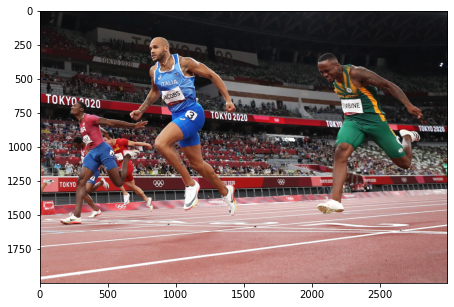

In [14]:
plt.imshow(jacobs); plt.show()

Analisi delle 3 componenti RGB

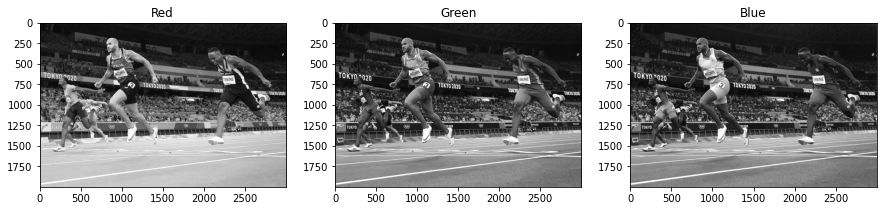

In [15]:
plt.subplot(1,3,1);plt.imshow(jacobs[:,:,0],cmap='gray'); plt.title('Red')
plt.subplot(1,3,2);plt.imshow(jacobs[:,:,1],cmap='gray'); plt.title('Green')
plt.subplot(1,3,3);plt.imshow(jacobs[:,:,2],cmap='gray'); plt.title('Blue')
plt.show()

Notare i livelli chiari della pista sulla componente RED e quelli della maglia di Marcell Jacobs per la componente BLUE

## 2) Convertire in YCbCr

In [16]:
jacobs_ycbcr=color.rgb2ycbcr(jacobs[:,:,0:3])

In [17]:
jacobs_ycbcr.shape

(1999, 3000, 3)

Analisi delle componenti Y (lume) e crominanza (Cb e Cr)

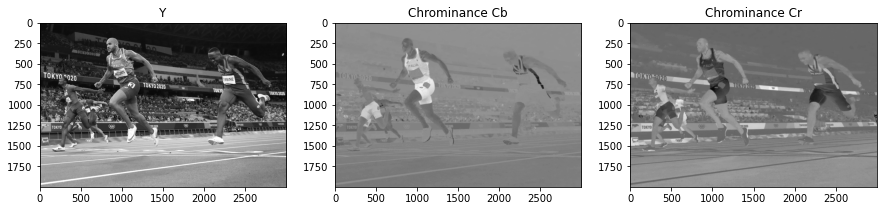

In [18]:
plt.subplot(1,3,1),plt.imshow(jacobs_ycbcr[:,:,0], cmap='gray');plt.title('Y') #Y: luminosità del pixel
plt.subplot(1,3,2),plt.imshow(jacobs_ycbcr[:,:,1], cmap='gray');plt.title('Chrominance Cb') #Cb
plt.subplot(1,3,3),plt.imshow(jacobs_ycbcr[:,:,2], cmap='gray');plt.title('Chrominance Cr') #Cr
plt.show()

## 3) Sfocare (filtro gaussiano) Cb e Cr


In [19]:
cb_gaussian=filters.gaussian(jacobs_ycbcr[:,:,1],sigma=1) #sigma=1 è quello di default
cr_gaussian=filters.gaussian(jacobs_ycbcr[:,:,2],sigma=1)

## 4) Visualizzare Y, Cb sfocato, Cr sfocato


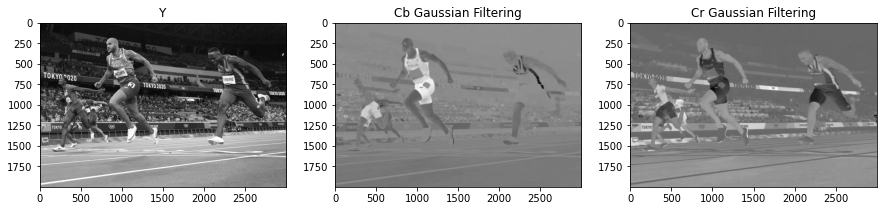

In [20]:
plt.subplot(1,3,1),plt.imshow(jacobs_ycbcr[:,:,0], cmap='gray');plt.title('Y') #Y: luminosità del pixel
plt.subplot(1,3,2),plt.imshow(cb_gaussian, cmap='gray');plt.title('Cb Gaussian Filtering')
plt.subplot(1,3,3),plt.imshow(cr_gaussian, cmap='gray');plt.title('Cr Gaussian Filtering')
plt.show()

A occhio nudo non trovo differenze

## 5) Ricostruire immagine RGB derivante da questa


In [21]:
jacobs_ycbcr_copy=jacobs_ycbcr.copy()
jacobs_ycbcr_copy[:,:,1]=cb_gaussian
jacobs_ycbcr_copy[:,:,2]=cr_gaussian
jacobs_back2rgb = color.ycbcr2rgb(jacobs_ycbcr_copy)
jacobs_back2rgb.shape

(1999, 3000, 3)

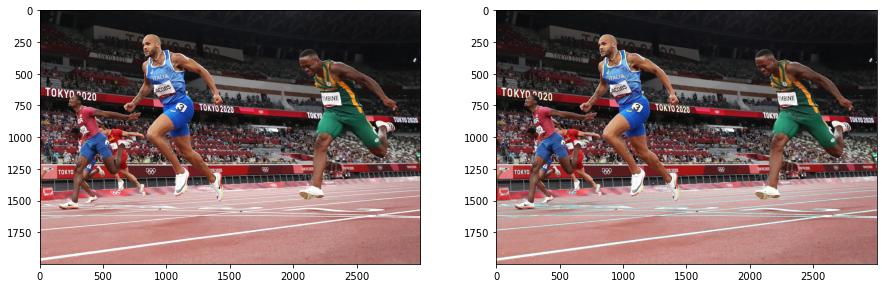

In [22]:
plt.subplot(1,2,1); plt.imshow(jacobs);
plt.subplot(1,2,2); plt.imshow((jacobs_back2rgb*255).astype('uint8')); 
# Warning
# Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
# Si risolve moltiplicando per 255 i valori e convertendo il type a 'uint8'
plt.show()

Nemmeno rimappando su rgb riesco a cogliere delle differenze così evidenti

## 6) Sfocare solo Y (Cb e Cr non sfocati) e ricostruire RGB


In [23]:
Y_gaussian=filters.gaussian(jacobs_ycbcr[:,:,0],sigma=1)
jacobs_ycbcr_copy_2=jacobs_ycbcr.copy()
jacobs_ycbcr_copy_2[:,:,0]=Y_gaussian
jacobs_back2rgb_2 = color.ycbcr2rgb(jacobs_ycbcr_copy_2)
jacobs_back2rgb_2.shape

(1999, 3000, 3)

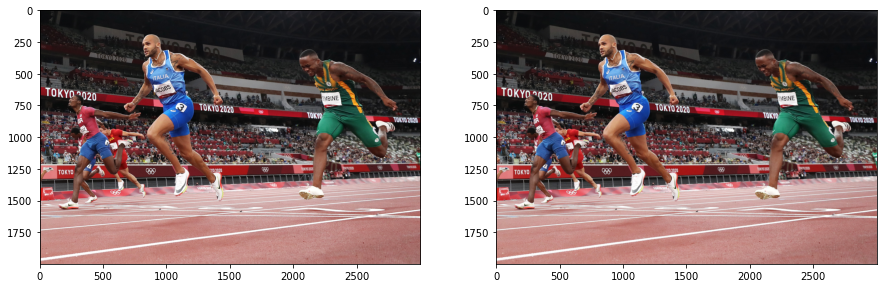

In [24]:
plt.subplot(1,2,1); plt.imshow(jacobs);
plt.subplot(1,2,2); plt.imshow((jacobs_back2rgb_2*255).astype('uint8')); 
plt.show()

Nemmeno in questo caso riesco a cogliere delle differenze evidenti, forse una minore luminosità (leggerissima).

## 7) Sperimentare con diverse entità del filtro gaussiano

### Filtro gaussiano alle dimensioni cromatiche Cb e Cr

In [25]:
#sigma 10
cb_gaussian_c1=filters.gaussian(jacobs_ycbcr[:,:,1],sigma=10) 
cr_gaussian_c1=filters.gaussian(jacobs_ycbcr[:,:,2],sigma=10)
jacobs_ycbcr_copy_c1=jacobs_ycbcr.copy()
jacobs_ycbcr_copy_c1[:,:,1]=cb_gaussian_c1
jacobs_ycbcr_copy_c1[:,:,2]=cr_gaussian_c1
jacobs_back2rgb_c1 = color.ycbcr2rgb(jacobs_ycbcr_copy_c1)

In [26]:
#sigma 50
cb_gaussian_c2=filters.gaussian(jacobs_ycbcr[:,:,1],sigma=50)
cr_gaussian_c2=filters.gaussian(jacobs_ycbcr[:,:,2],sigma=50)
jacobs_ycbcr_copy_c2=jacobs_ycbcr.copy()
jacobs_ycbcr_copy_c2[:,:,1]=cb_gaussian_c2
jacobs_ycbcr_copy_c2[:,:,2]=cr_gaussian_c2
jacobs_back2rgb_c2 = color.ycbcr2rgb(jacobs_ycbcr_copy_c2)

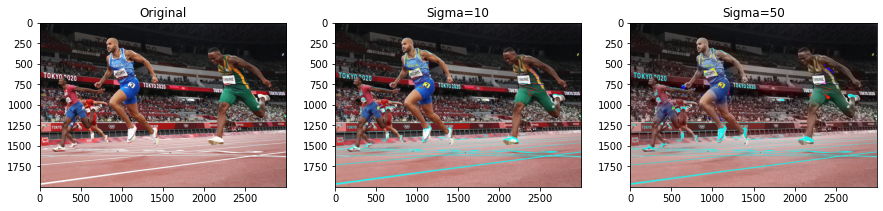

In [27]:
plt.subplot(1,3,1); plt.imshow(jacobs); plt.title('Original')
plt.subplot(1,3,2); plt.imshow((jacobs_back2rgb_c1*255).astype('uint8')); plt.title('Sigma=10') 
plt.subplot(1,3,3); plt.imshow((jacobs_back2rgb_c2*255).astype('uint8')); plt.title('Sigma=50') 
plt.show()

Colori sempre meno definiti e sempre più confusi all'aumentare di sigma:
* Il colore bianco delle strisce in pista, delle scritte e delle scarpe degli atleti diventa sempre meno forte e anzi si confonde in una sorta di azzurro 
* L'abbronzatura di Jacobs è ancora percepita con sigma=10. Al contrario con sigma=50 si attenua fortemente questo dettaglio cromatico. Lo stesso vale per le grafiche sulla maglia azzurra.
* In generale si nota proprio una perdita di dettagli cromatici

### Filtro gaussiano alla dimensione lume Y

In [28]:
#sigma 10
y_gaussian_1=filters.gaussian(jacobs_ycbcr[:,:,0],sigma=10) 
jacobs_ycbcr_copy_y1=jacobs_ycbcr.copy()
jacobs_ycbcr_copy_y1[:,:,0]=y_gaussian_1
jacobs_back2rgb_y1 = color.ycbcr2rgb(jacobs_ycbcr_copy_y1)

In [29]:
#sigma 50
y_gaussian_2=filters.gaussian(jacobs_ycbcr[:,:,0],sigma=50) 
jacobs_ycbcr_copy_y2=jacobs_ycbcr.copy()
jacobs_ycbcr_copy_y2[:,:,0]=y_gaussian_2
jacobs_back2rgb_y2 = color.ycbcr2rgb(jacobs_ycbcr_copy_y2)

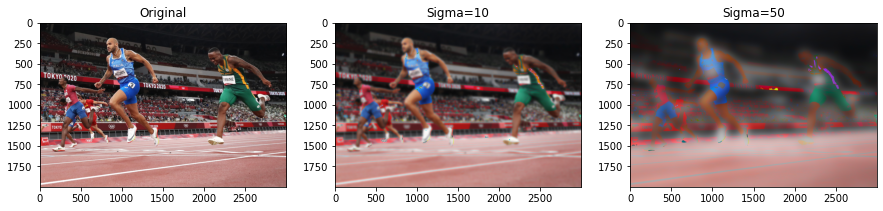

In [30]:
plt.subplot(1,3,1); plt.imshow(jacobs); plt.title('Original')
plt.subplot(1,3,2); plt.imshow((jacobs_back2rgb_y1*255).astype('uint8')); plt.title('Sigma=10') 
plt.subplot(1,3,3); plt.imshow((jacobs_back2rgb_y2*255).astype('uint8')); plt.title('Sigma=50') 
plt.show()

* Con sigma=10 l'immagine sembra solo sfocata, non messa a fuoco.
* Con sigma=50 invece l'immagine perde proprio qualsiasi tipo di dettaglio: gli atleti appaiono come degli "spettri" (si delineano a malapena i contorni) su uno sfondo indefinito caratterizzato esclusivamente dal terreno arancione e dai led dello stadio.

### A tutte e 3 le dimensioni (Y, Cb, Cr)

In [31]:
jacobs_gaussian_1=filters.gaussian(jacobs_ycbcr,sigma=10)
jacobs_back2rgb_total_1 = color.ycbcr2rgb(jacobs_gaussian_1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  """Entry point for launching an IPython kernel.


In [32]:
jacobs_gaussian_2=filters.gaussian(jacobs_ycbcr,sigma=50) 
jacobs_back2rgb_total_2 = color.ycbcr2rgb(jacobs_gaussian_2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  """Entry point for launching an IPython kernel.


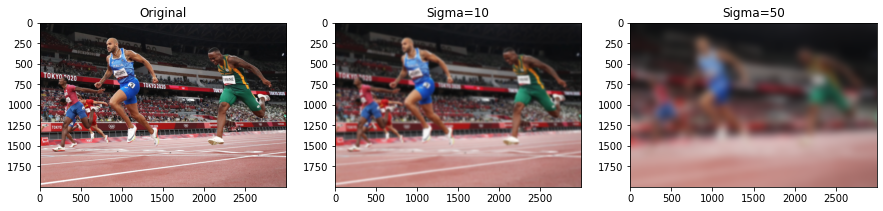

In [33]:
plt.subplot(1,3,1); plt.imshow(jacobs); plt.title('Original')
plt.subplot(1,3,2); plt.imshow((jacobs_back2rgb_total_1*255).astype('uint8')); plt.title('Sigma=10') 
plt.subplot(1,3,3); plt.imshow((jacobs_back2rgb_total_2*255).astype('uint8')); plt.title('Sigma=50') 
plt.show()

* Con sigma=10 l'immagine sembra solo leggermente sfocata, non messa a fuoco.
* Con sigma=50, l'ambiente e gli atleti diventano quasi indistinguibili, delle macchie di colore.